# Partie sur la prediction des données

## Prédiction des scores des elections du second tour 2022

### Préparation des données

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
#creation du dataset
df_age = pd.read_excel('AutreData/tauxChomage.xlsx')
df_age = df_age.iloc[:, [0, 12,13,14,15,16,17,23,24,25,26,27,28]]
df_age = df_age.rename(columns={'COM': 'Commune'})
print(df_age)

df_niveauEtude = pd.read_excel('AutreData/NiveauEtudeJeune2017.xlsx', sheet_name='Figure 1a').dropna()
df_niveauEtude = df_niveauEtude.iloc[:, [1, 2]]
df_niveauEtude.columns = ['Departement', 'niveauEtude']

df_densitePop = pd.read_excel('AutreData/NbPopDepartement2023.xls', sheet_name='2023').dropna()
df_densitePop = df_densitePop.iloc[:, [1, 7]]
df_densitePop.columns = ['Departement', 'nbPersonne']

df_magasinBIO = pd.read_excel('AutreData/MagasinBio2016.xls', sheet_name='Figure 2').dropna()
df_magasinBIO.columns = ['Departement', 'Proximité']

df_PopImmigre = pd.read_excel('AutreData/PopImmigré.xlsx').dropna()
df_PopImmigre = df_PopImmigre.iloc[:, [1, 2]]
df_PopImmigre.columns = ['Departement', 'Immigré']

# Charger les données des résultats présidentiels
df_resultatPresidentielle = pd.read_excel('resultats-par-niveau-subcom-t2-france-entiere.xlsx').dropna()
df_resultatPresidentielle = df_resultatPresidentielle.iloc[:, [1, 25, 32]]
df_resultatPresidentielle.columns = [ 'Departement', 'Macron', 'Lepen']
df_resultatPresidentielle = df_resultatPresidentielle.groupby('Departement')[['Macron', 'Lepen']].mean().reset_index()

df_concat = pd.merge(df_densitePop, df_resultatPresidentielle, on='Departement')
df_concat = pd.merge(df_concat, df_niveauEtude, on='Departement')
df_concat = pd.merge(df_concat, df_pourcent_chomage, on='Departement')
df_concat = pd.merge(df_concat, df_magasinBIO, on='Departement')
df_concat = pd.merge(df_concat, df_PopImmigre, on='Departement')
print(df_concat)

                Departement nbPersonne     Macron      Lepen niveauEtude  \
0                       Ain     671937  50.982366  49.017659        41.4   
1                     Aisne     522791  38.089161  61.910914        29.7   
2                    Allier     332443  48.201987  51.798013        33.4   
3   Alpes-de-Haute-Provence     166654  47.890556  52.109697        37.2   
4              Hautes-Alpes     139942  53.414383  46.585802        41.7   
..                      ...        ...        ...        ...         ...   
89    Territoire de Belfort     136891  45.499208  54.500792        43.3   
90                  Essonne    1316053  58.871340  41.128711        47.5   
91           Hauts-de-Seine    1642002  80.148611  19.851389        71.1   
92             Val-de-Marne    1426748  71.616596  28.383404        56.1   
93               Val-d'Oise    1274374  58.109402  41.890707        45.2   

    tauxChomage Proximité   Immigré  
0           5.5      1.66   79312.0  
1          

In [3]:
# Sélection des features
df_concat = df_concat.sample(frac=1)
features = df_concat.drop(['Departement','Macron', 'Lepen'], axis=1).values
ScoreMacron =  df_concat['Macron'].values.reshape(-1, 1)
ScoreLepen =  df_concat['Lepen'].values.reshape(-1, 1)

# Normalisation des données
scalerX = StandardScaler()
X_scaled = scalerX.fit_transform(features)
scalerMacron = StandardScaler()
ScoreMacron = scalerMacron.fit_transform(ScoreMacron)
scalerLepen = StandardScaler()
ScoreLepen = scalerLepen.fit_transform(ScoreLepen)

#division des données
split_index1 = int(df_concat.shape[0] * 0.8)
split_index2 = int(df_concat.shape[0] * 0.9)

X_train, X_val, X_test = X_scaled[:split_index1, :], X_scaled[split_index1:split_index2, :], X_scaled[split_index2:, :]
y_train_Lepen, y_val_Lepen, y_test_Lepen = ScoreLepen[:split_index1], ScoreLepen[split_index1:split_index2], ScoreLepen[split_index2:]
y_train_Marcon, y_val_Marcon, y_test_Marcon = ScoreMacron[:split_index1], ScoreMacron[split_index1:split_index2], ScoreMacron[split_index2:]

[[ 2.03484183e-02  2.08138772e-01  7.06059813e-02 -7.20840231e-01
   8.50007977e-02]
 [-1.11178364e-01  5.91040528e-01 -3.62239382e-01  7.93242299e-02
  -3.05414866e-01]
 [-7.87226294e-01 -8.91159818e-01  1.72984654e+00 -1.86393232e+00
  -6.00511697e-01]
 [ 1.49155061e+00 -9.03511488e-01  9.36296708e-01 -1.48583263e+00
  -3.51746037e-01]
 [ 8.48605347e-01  1.34449237e+00 -1.15578922e+00  9.32246787e-01
  -1.27845613e-01]
 [ 4.19835473e-02  8.50425589e-01 -9.39366533e-01 -2.63603396e-01
  -1.39655026e-01]
 [ 8.32745210e-01  6.40447206e-01  2.87028663e-01  9.05867739e-01
   1.24375851e+00]
 [-1.07925644e+00 -7.92346462e-01 -1.53491264e-03 -1.27480024e+00
  -7.22030303e-01]
 [-7.10466068e-01 -3.72389697e-01 -1.44435279e+00 -1.03738881e+00
  -6.52772755e-01]
 [-3.55488130e-01 -7.42939784e-01  3.38908710e+00 -4.04291653e-01
  -1.63550832e-01]
 [-9.59994801e-01 -2.48873001e-01  2.14887769e-01 -3.60326573e-01
  -6.42549681e-01]
 [ 1.43942613e+00  1.92502084e+00  7.06059813e-02  4.57423920e-01

### Application de Regression

### Reseau de neuronne

In [4]:
import tensorflow as tf
from tensorflow.keras import optimizers, losses, callbacks
import numpy as np

X_trainNN = np.array(X_train,dtype=float)
y_trainNN_Lepen = np.array(y_train_Lepen,dtype=float)
y_trainNN_Marcon = np.array(y_train_Marcon,dtype=float)

X_valNN = np.array(X_val,dtype=float)
y_valNN_Lepen = np.array(y_val_Lepen,dtype=float)
y_valNN_Marcon = np.array(y_val_Marcon,dtype=float)

X_testNN = np.array(X_test,dtype=float)
y_testNN_Lepen = np.array(y_test_Lepen,dtype=float)
y_testNN_Marcon = np.array(y_test_Marcon,dtype=float)


CallBackSave = callbacks.ModelCheckpoint("best_model.h5", 
                                                 monitor='val_loss', 
                                                 save_best_only=True, 
                                                 mode='min')

callbackStop = callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=20)

"""class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_loss') is not None and logs.get('val_loss') < 0.3:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callbackStop = myCallback()"""

def createModel():
    #model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[features.shape[1]])])

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(features.shape[1], activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error',
                  optimizer=optimizers.Adam())
    return model

def affichagePrediction(prediction, reel):
    for i in range(len(prediction)):
        print("valeur prédite :", prediction[i], "valeur réelle :", reel[i], "écart :", np.abs(prediction[i] - reel[i]))

#### Entrainement pour Macron

In [5]:
model = createModel()
history = model.fit(X_trainNN, y_trainNN_Marcon,
                    epochs=1000,validation_data=(X_valNN, y_valNN_Marcon),
                    callbacks=[CallBackSave,callbackStop]
                   )

Epoch 1/1000


2024-04-18 02:10:47.836235: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3/3 [==============================] - 0s 73ms/step - loss: 0.7911 - val_loss: 1.8391
Epoch 2/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6344 - val_loss: 1.2390
Epoch 3/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4828 - val_loss: 0.7572
Epoch 4/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.4738 - val_loss: 0.8226
Epoch 5/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.5113 - val_loss: 0.6988
Epoch 6/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.4106 - val_loss: 0.9518
Epoch 7/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.4547 - val_loss: 0.8516
Epoch 8/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.4013 - val_loss: 0.6131
Epoch 9/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.3777 - val_loss: 0.6360
Epoch 10/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.3991 - val_loss: 0.6632
Epoch 11/1000
3/3 [====

In [6]:
best_model = tf.keras.models.load_model("best_model.h5")

print("Sur les entrainement la valeur reel : ", scalerMacron.inverse_transform(y_trainNN_Marcon[0].reshape(-1, 1)), "; valeur predite : ",scalerMacron.inverse_transform(best_model.predict(X_trainNN[0:1]).reshape(-1, 1)))


y_pred_NN = best_model.predict(X_testNN)

reel = scalerMacron.inverse_transform(y_testNN_Marcon)
prediction = scalerMacron.inverse_transform(y_pred_NN.reshape(-1, 1)).flatten()

print("Affichage des predictions sur le test pour Macron")
affichagePrediction(prediction, reel)

test_loss = model.evaluate(X_testNN, y_testNN_Marcon)
print("Perte de test :", test_loss)

1/1 [==============================] - 0s 65ms/step
Sur les entrainement la valeur reel :  [[48.00046154]] ; valeur predite :  [[50.256824]]
1/1 [==============================] - 0s 20ms/step
Affichage des predictions sur le test pour Macron
valeur prédite : 47.15647 valeur réelle : [56.2899449] écart : [9.13347365]
valeur prédite : 51.593998 valeur réelle : [47.46815126] écart : [4.12584669]
valeur prédite : 50.305546 valeur réelle : [53.41438272] écart : [3.10883691]
valeur prédite : 51.039772 valeur réelle : [45.30138462] écart : [5.73838742]
valeur prédite : 48.728313 valeur réelle : [42.04227181] écart : [6.68604164]
valeur prédite : 54.27242 valeur réelle : [51.43095575] écart : [2.84146322]
valeur prédite : 47.523735 valeur réelle : [47.89268482] écart : [0.36894978]
valeur prédite : 48.735302 valeur réelle : [53.58883792] écart : [4.85353595]
valeur prédite : 46.57111 valeur réelle : [51.83148052] écart : [5.26037075]
valeur prédite : 46.184444 valeur réelle : [40.70024119] éc

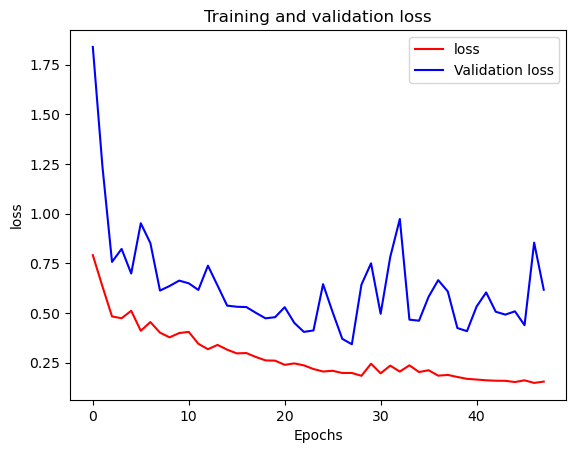

In [7]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [*range(len(loss))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", "Validation loss"])
plt.show()

#### Entrainement pour Lepen

In [8]:
model = createModel()
history = model.fit(X_trainNN, y_trainNN_Lepen,
                    epochs=1000,validation_data=(X_valNN, y_valNN_Lepen),
                    callbacks=[CallBackSave,callbackStop]
                   )

Epoch 1/1000
3/3 [==============================] - 0s 46ms/step - loss: 0.8089 - val_loss: 2.1820
Epoch 2/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6941 - val_loss: 1.7696
Epoch 3/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.5795 - val_loss: 1.2163
Epoch 4/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.4740 - val_loss: 0.9065
Epoch 5/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.4006 - val_loss: 0.8179
Epoch 6/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.3699 - val_loss: 0.8670
Epoch 7/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.3599 - val_loss: 0.8648
Epoch 8/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.3566 - val_loss: 0.8669
Epoch 9/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.3302 - val_loss: 0.8904
Epoch 10/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.3284 - val_loss: 0.8491
Epoch 11/100

In [9]:
best_model = tf.keras.models.load_model("best_model.h5")

print("Sur les entrainement la valeur reel : ", scalerLepen.inverse_transform(y_trainNN_Lepen[0].reshape(-1, 1)), "; valeur predite : ",scalerLepen.inverse_transform(best_model.predict(X_trainNN[0:1]).reshape(-1, 1)))

y_pred_NN = best_model.predict(X_testNN)

reel = scalerLepen.inverse_transform(y_testNN_Lepen)
prediction = scalerLepen.inverse_transform(y_pred_NN.reshape(-1, 1)).flatten()

print("Affichage des predictions sur le test pour Lepen")
affichagePrediction(prediction, reel)

test_loss = model.evaluate(X_testNN, y_testNN_Lepen)
print("Perte de test :", test_loss)

1/1 [==============================] - 0s 46ms/step
Sur les entrainement la valeur reel :  [[51.99953846]] ; valeur predite :  [[47.47044]]
1/1 [==============================] - 0s 13ms/step
Affichage des predictions sur le test pour Lepen
valeur prédite : 44.378456 valeur réelle : [43.71011019] écart : [0.66834592]
valeur prédite : 48.804005 valeur réelle : [52.53184874] écart : [3.72784407]
valeur prédite : 47.51903 valeur réelle : [46.58580247] écart : [0.93322906]
valeur prédite : 48.251274 valeur réelle : [54.69861538] écart : [6.44734128]
valeur prédite : 45.946056 valeur réelle : [57.75490872] écart : [11.80885236]
valeur prédite : 51.475193 valeur réelle : [48.56909735] écart : [2.90609568]
valeur prédite : 44.744728 valeur réelle : [52.10731518] écart : [7.36258709]
valeur prédite : 45.953026 valeur réelle : [46.10541284] écart : [0.15238703]
valeur prédite : 43.794678 valeur réelle : [48.1685974] écart : [4.37391967]
valeur prédite : 43.409054 valeur réelle : [59.11432282] é

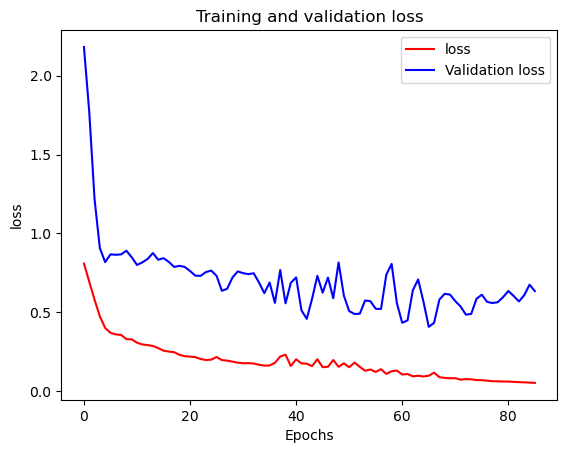

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [*range(len(loss))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss", "Validation loss"])
plt.show()